Gempy Model Notebook BuFaTa

In [1]:
import sys
#sys.path.append('../../../gemgis')
#import gemgis as gg
#import geopandas as gpd
#import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

import gempy as gp

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\vonha\miniconda3\envs\gemgis_env\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# load input data
orientations = pd.read_csv("orientations_BuFaTa").drop(['Unnamed: 0'],axis=1)
orientations


,index,X,Y,Z,formation,dip,azimuth,polarity
0,0,96.471041,451.563621,441.094095,Ton,30.5,180.0,1
1,1,172.761009,661.876505,556.867380,Ton,30.5,180.0,1
2,2,383.073893,957.757866,722.911087,Ton,30.5,180.0,1
3,3,592.355831,722.702290,601.566862,Ton,30.5,180.0,1
4,4,766.585622,348.469070,378.006473,Ton,30.5,180.0,1
5,5,843.906535,167.022661,277.636299,Ton,30.5,180.0,1
6,6,941.846359,428.882820,425.846281,Ton,30.5,180.0,1
7,7,22.142208,299.552757,387.829132,Ton,30.5,180.0,1


In [3]:
interfaces = pd.read_csv("interfaces_BuFaTa").drop(['Unnamed: 0'],axis=1)
interfaces

,index,X,Y,Z,formation
0,0,0.256327,264.862147,387.256441,Sand1
1,0,10.593468,276.733708,387.136342,Sand1
2,0,17.134940,289.089822,387.379871,Sand1
3,0,19.150128,293.313485,387.523852,Sand1
4,0,27.795117,310.571693,388.501235,Sand1
...,...,...,...,...,...
126,2,636.023304,859.787827,616.676190,Ton
127,2,608.850959,912.396263,647.803661,Ton
128,2,560.109925,990.617267,696.266604,Ton
129,2,526.375318,1045.388234,716.806593,Ton


In [4]:
# create model
geo_model = gp.create_model("BuFaTa_Example")
geo_model

BuFaTa_Example  2020-11-11 15:48

In [5]:
# init model
gp.init_data(geo_model, [0, 972, 0, 1069, 300, 800], [50, 50, 50],
             surface_points_df = interfaces,
             orientations_df = orientations,
             default_values=True)

Active grids: ['regular']


BuFaTa_Example  2020-11-11 15:48

In [6]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Sand1,Default series,1,#015482,1
1,Ton,Default series,2,#9f0052,2


In [7]:
gp.map_stack_to_surfaces(geo_model,
                         {"Default_Series": ('Sand1','Ton')},
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

,surface,series,order_surfaces,color,id
0,Sand1,Default_Series,1,#015482,1
1,Ton,Default_Series,2,#9f0052,2
2,basement,Default_Series,3,#ffbe00,3


In [8]:
#geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

In [9]:
geo_model.set_topography(
    source='gdal', filepath='raster1.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   9.72      ,   10.69      ,  305.        ],
       [   9.72      ,   10.69      ,  315.        ],
       [   9.72      ,   10.69      ,  325.        ],
       ...,
       [ 970.056     , 1059.28181818,  622.0892334 ],
       [ 970.056     , 1063.16909091,  622.06713867],
       [ 970.056     , 1067.05636364,  622.05786133]])

In [10]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range             1528.9
$C_o$            55655.8
drift equations      [3]


In [11]:
sol = gp.compute_model(geo_model, compute_mesh=True)

In [12]:
#geo_model.surfaces.df

C:\Users\vonha\miniconda3\envs\gemgis_env\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


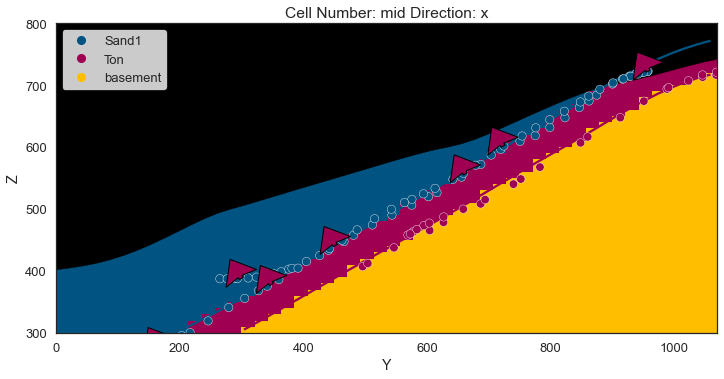

In [13]:
gp.plot_2d(geo_model, direction='x', show_topography=True)

C:\Users\vonha\miniconda3\envs\gemgis_env\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


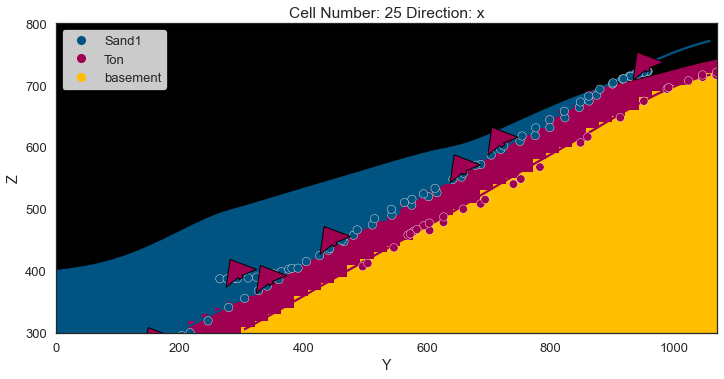

In [14]:
gp.plot_2d(geo_model, direction='x', show_topography=True, cell_number=25)

C:\Users\vonha\miniconda3\envs\gemgis_env\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


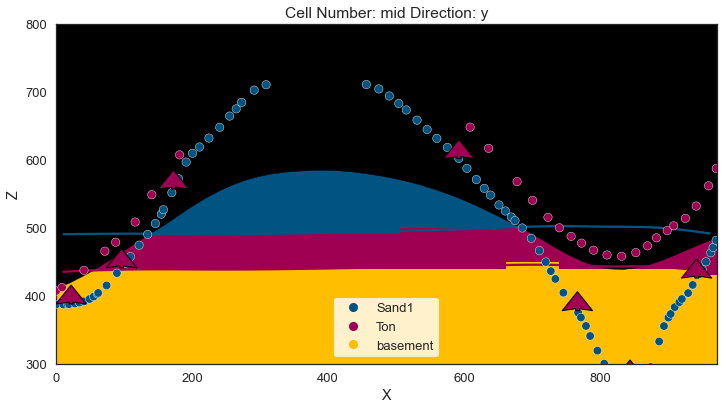

In [15]:
gp.plot_2d(geo_model, direction='y', show_topography=True)

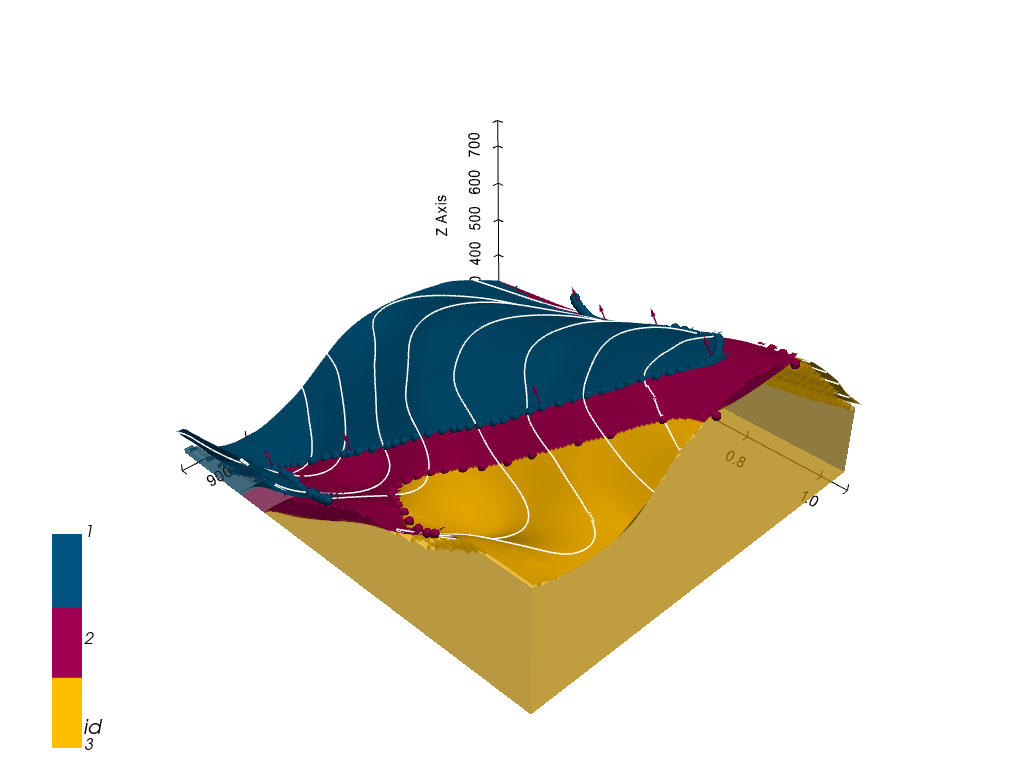

In [16]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)

In [17]:
gp.plot_3d(geo_model, show_boundaries=False, show_topography=True, show_data=False)